In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(400, 2) (400, 1)


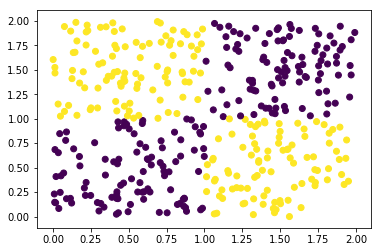

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']

### To fit the data we need 2 projection--->prediction

In [12]:
max_points = 2
lr=0.1

linear1 = tnn.WeightsLayer(2,2, optimizer=tnn.SGD(lr))
spline2 = tsp.SplineVectorLayer(2, max_points=max_points)
linear3 = tnn.WeightsLayer(2,2, optimizer=tnn.SGD(lr))
spline4 = tsp.SplineVectorLayer(2, max_points=max_points)
linear5 = tnn.NonLinearLayer(2,1, activation=tnn.Sigmoid(), optimizer=tnn.SGD(lr))

max_points = 3
for spline in spline2.spline_list:
    spline.n_max = max_points
for spline in spline4.spline_list:
    spline.n_max = max_points

loss_func = tnn.CrossEntropyBinary()

_______________________
Steps 0
Error 1.0135506673838


_______________________
Steps 100
Error 0.6875866971275417


_______________________
Steps 200
Error 0.6853179443715806


_______________________
Steps 300
Error 0.6821030455323425


_______________________
Steps 400
Error 0.6770789132648966


_______________________
Steps 500
Error 0.6685102644526278


_______________________
Steps 600
Error 0.6533565433426315


_______________________
Steps 700
Error 0.6236169355365813


_______________________
Steps 800
Error 0.5781992400627682


_______________________
Steps 900
Error 0.5211652956113124


_______________________
Steps 1000
Error 0.44858763098882215


_______________________
Steps 1100
Error 0.3807106014624573


_______________________
Steps 1200
Error 0.34584166564148433


_______________________
Steps 1300
Error 0.3315156846707428


_______________________
Steps 1400
Error 0.32498829053547157


_______________________
Steps 1500
Error 0.3215341332855363


____________________

_______________________
Steps 13500
Error nan


_______________________
Steps 13600
Error nan


_______________________
Steps 13700
Error nan


_______________________
Steps 13800
Error nan


_______________________
Steps 13900
Error nan


_______________________
Steps 14000
Error nan


_______________________
Steps 14100
Error nan


_______________________
Steps 14200
Error nan


_______________________
Steps 14300
Error nan


_______________________
Steps 14400
Error nan


_______________________
Steps 14500
Error nan


_______________________
Steps 14600
Error nan


_______________________
Steps 14700
Error nan


_______________________
Steps 14800
Error nan


_______________________
Steps 14900
Error nan


_______________________
Steps 15000
Error nan


_______________________
Steps 15100
Error nan


_______________________
Steps 15200
Error nan


_______________________
Steps 15300
Error nan


_______________________
Steps 15400
Error nan


_______________________
Steps 15500
Erro

TclError: invalid command name "pyimage35"

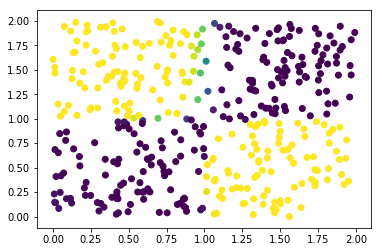

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
y_ = y.reshape(-1)
for step in range(100000):
    
    a1 = linear1.forward(x)
    a2 = spline2.forward(a1)
    a3 = linear3.forward(a2)
    a4 = spline4.forward(a3)
    yout = linear5.forward(a4)
    
    dy = loss_func.del_loss(yout, y)
    
    da4 = linear5.backward(dy)
    da3 = spline4.backward(da4)
    da2 = linear3.backward(da3)
    da1 = spline2.backward(da2)
    dx = linear1.backward(da1)

    linear1.update()
    spline2.update(lr)
    linear3.update()
    spline4.update(lr)
    linear5.update()
    
    if step % 1000 == 0:
        splines = spline2.spline_list + spline4.spline_list
        for spline in splines:
            spline._combine_linear_points_()
            spline._remove_close_points_()
            spline._remove_no_input_points_()
            spline._add_new_point_()
                
    if step % 100 == 0:
            
        error = loss_func.loss(yout, y)

        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (yout>0.5).astype(int)
        
        plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1))
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

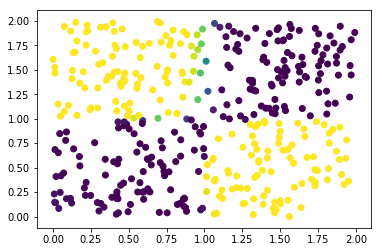

In [14]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1))

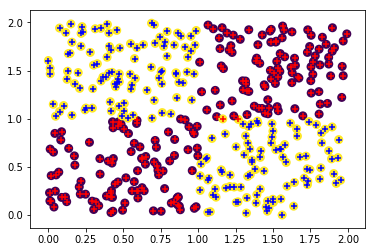

In [15]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [26]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

a1 = linear1.forward(xxyy)
a2 = spline2.forward(a1)
a3 = linear3.forward(a2)
a4 = spline4.forward(a3)
yout = linear5.forward(a4)

out = (yout>0.5).astype(int)

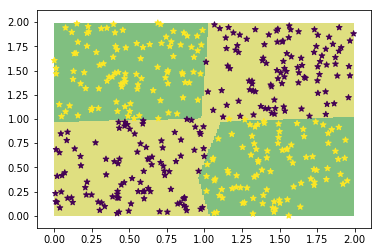

In [27]:
plt.imshow(out.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

In [22]:
## visualizing the layers and backwarding the pivot points

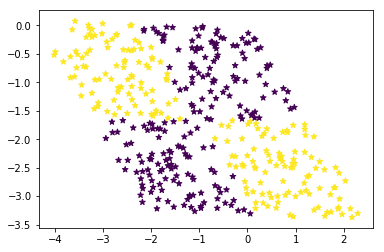

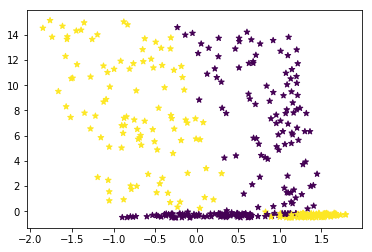

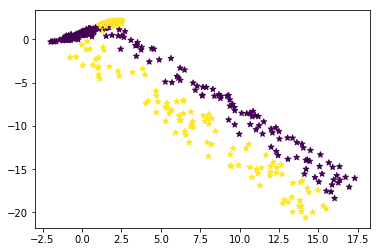

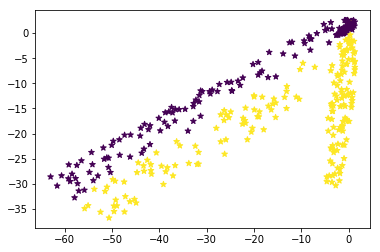

In [29]:
a1 = linear1.forward(x)
a2 = spline2.forward(a1)
a3 = linear3.forward(a2)
a4 = spline4.forward(a3)
yout = linear5.forward(a4)

out = (yout>0.5).astype(int)
plt.scatter(a1[:,0], a1[:, 1], c=y.reshape(-1), marker='*')
plt.show()
plt.scatter(a2[:,0], a2[:, 1], c=y.reshape(-1), marker='*')
plt.show()
plt.scatter(a3[:,0], a3[:, 1], c=y.reshape(-1), marker='*')
plt.show()
plt.scatter(a4[:,0], a4[:, 1], c=y.reshape(-1), marker='*')
plt.show()

In [30]:
## backwarding all pivot points(spline4) to previous space

In [31]:
inv_linear3 = np.linalg.pinv(linear3.weights)
inv_linear3.shape

(2, 2)

In [32]:
inv_linear3[:1, :].shape

(1, 2)

In [38]:
spline = spline4.spline_list[0]
sp0_ba2 = spline.X.reshape(-1,1)@inv_linear3[:1, :]

spline = spline4.spline_list[1]
sp1_ba2 = spline.X.reshape(-1,1)@inv_linear3[1:, :]

print(sp0_ba2);print(sp1_ba2)

[[-0.79289774 -0.647836  ]
 [ 0.42727301  0.34910282]
 [ 6.87129621  5.61418308]]
[[-7.40600802 10.59027561]
 [ 0.48862016 -0.69870599]
 [ 0.79770174 -1.14067947]]


In [72]:
pivA2 = np.vstack((sp0_ba2,sp1_ba2))
pivA2

array([[-0.79289774, -0.647836  ],
       [ 0.42727301,  0.34910282],
       [ 6.87129621,  5.61418308],
       [-7.40600802, 10.59027561],
       [ 0.48862016, -0.69870599],
       [ 0.79770174, -1.14067947]])

In [92]:
def _calculate_rangeY_(self:tsp.Spline1D, y):
    rangeY = np.zeros((self.n_points-1, y.shape[0]))
    
    def _inrange2_(X, break0, break1): #if x is after
        xmsk1 = X >= break0
        xmsk2 = X < break1
        xmsk12 = np.bitwise_and(xmsk1, xmsk2)
        xmsk3 = X < break0
        xmsk4 = X >= break1
        xmsk34 = np.bitwise_and(xmsk3, xmsk4)
        xs = np.bitwise_or(xmsk12, xmsk34)
        return xs

    for i in range(self.n_points-1):
        if self.n_points-2 == 0:
            rangeY[i] = _inrange2_(y, -np.inf, np.inf)
        elif i==0:
            sign = -1 if self.Y[0]<self.Y[1] else 1
            rangeY[i] = _inrange2_(y, sign*np.inf, self.Y[1])
        elif i== self.n_points-2:
            sign = 1 if self.Y[i]<self.Y[i+1] else -1
            rangeY[i] = _inrange2_(y, self.Y[i], sign*np.inf)
        else:
            rangeY[i] = _inrange2_(y, self.Y[i], self.Y[i+1])
    notInRange = np.where(rangeY.sum(axis=0) == 0)[0]
    #### for the values of y that are missed by the whole curve
    rangeY[:, notInRange] = self.rangeX[:, notInRange]
    return rangeY

def reverse1(self:tsp.Spline1D, y, rangeY=None):
    if rangeY is None:
        rangeY = _calculate_rangeY_(self, y)
        
    x = np.zeros((self.n_points-1, len(y)))
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x[i] = xpossible*rangeY[i]
    return x


def reverse_pivots(self:tsp.Spline1D, y):
    x_possible = reverse1(self, y)

    trans_x = []
    y_possible = []
    for i, x_p in enumerate(x_possible):
        y_p = self.forward(x_p)
        mask = (np.abs(y_p - y) < 1e-15)
#         print(mask)
#         print(x_p)
#         print(y_p)
        for xpm, ypm in zip(x_p[mask], y[mask]):
            trans_x.append(xpm)
            y_possible.append(ypm)

    trans_x = np.array(trans_x)
    y_possible = np.array(y_possible)

    return trans_x, y_possible

In [97]:
# pivA10, pivA20 = reverse_pivots(spline2.spline_list[0], pivA2[:,0])
# pivA11, pivA21 = reverse_pivots(spline2.spline_list[1], pivA2[:,1])

In [98]:
# pivA10, pivA11

In [99]:
# pivA2[:,0]

In [100]:
# pivA20

In [101]:
## only backwarding the X of spline4
sp0_ba2

array([[-0.79289774, -0.647836  ],
       [ 0.42727301,  0.34910282],
       [ 6.87129621,  5.61418308]])

In [103]:
sp0_ba1, sp0_ba2_ = reverse_pivots(spline2.spline_list[0], sp0_ba2[:,0])

In [104]:
sp0_ba1, sp0_ba2_

(array([-19.75645584,   0.83113694,  -0.85141886]),
 array([ 6.87129621, -0.79289774,  0.42727301]))